In [568]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [569]:
df = pd.read_excel('Dane.xlsx')

In [570]:
#dane zostały wstępnie przefiltrowane w power query i zostały usunięte obserwacje bez danych
#tylko bloki i tylko Warszawa
df.head(10)

,city,type,squareMeters,rooms,floor,buildYear,centreDistance,poiCount,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,warszawa,blockOfFlats,77.00,3.0,2.0,2022.0,11.43,3.0,condominium,yes,yes,yes,yes,no,950000
1,warszawa,blockOfFlats,62.20,4.0,4.0,1981.0,10.31,13.0,condominium,no,yes,no,no,yes,680000
2,warszawa,blockOfFlats,73.40,3.0,6.0,2007.0,5.68,60.0,condominium,yes,yes,yes,no,no,954000
3,warszawa,blockOfFlats,48.07,3.0,13.0,1972.0,0.67,52.0,cooperative,no,no,yes,no,yes,720000
4,warszawa,blockOfFlats,56.20,3.0,3.0,1961.0,4.86,14.0,cooperative,no,yes,yes,no,yes,840000
5,warszawa,blockOfFlats,32.00,2.0,2.0,2005.0,12.01,16.0,condominium,no,yes,no,no,no,468000
6,warszawa,blockOfFlats,60.00,2.0,5.0,2000.0,7.15,7.0,condominium,no,no,no,no,no,785000
7,warszawa,blockOfFlats,42.86,2.0,2.0,1971.0,5.97,8.0,condominium,no,yes,yes,no,yes,575000
8,warszawa,blockOfFlats,37.14,2.0,8.0,1973.0,4.70,23.0,cooperative,no,no,yes,no,yes,649000
9,warszawa,blockOfFlats,59.50,3.0,4.0,1973.0,4.13,18.0,condominium,no,yes,no,no,yes,796000


In [571]:
df.rename(columns = {'squareMeters':'area', 'buildYear': 'year', 'centreDistance':'centre', 'poiCount':'poi','hasParkingSpace':'parking', 'hasBalcony':'balcony', 'hasElevator':'elevator', 'hasSecurity':'security', 'hasStorageRoom':'storage'}, inplace = True)

In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1580 non-null   object 
 1   type       1580 non-null   object 
 2   area       1580 non-null   float64
 3   rooms      1580 non-null   float64
 4   floor      1580 non-null   float64
 5   year       1580 non-null   float64
 6   centre     1580 non-null   float64
 7   poi        1580 non-null   float64
 8   ownership  1580 non-null   object 
 9   parking    1580 non-null   object 
 10  balcony    1580 non-null   object 
 11  elevator   1580 non-null   object 
 12  security   1580 non-null   object 
 13  storage    1580 non-null   object 
 14  price      1580 non-null   int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 185.3+ KB


In [573]:
df.describe().round(2)
#1580 obserwacji

,area,rooms,floor,year,centre,poi,price
count,1580.00,1580.0,1580.00,1580.00,1580.00,1580.00,1580.00
mean,57.93,2.7,3.98,1988.42,6.49,20.13,849467.02
std,20.79,0.9,2.83,20.60,3.11,18.26,302509.02
min,25.00,1.0,1.00,1895.00,0.02,0.00,335000.00
25%,42.50,2.0,2.00,1972.00,4.27,10.00,656550.00
50%,54.85,3.0,3.00,1986.00,6.32,15.00,780000.00
75%,67.02,3.0,5.00,2005.00,8.16,24.00,950000.00
max,149.80,6.0,18.00,2023.00,15.67,127.00,2500000.00


In [574]:
df.tail(10)

,city,type,area,rooms,floor,year,centre,poi,ownership,parking,balcony,elevator,security,storage,price
1570,warszawa,blockOfFlats,63.40,4.0,4.0,1989.0,9.16,20.0,cooperative,no,no,no,no,yes,670000
1571,warszawa,blockOfFlats,113.80,4.0,10.0,1987.0,10.58,33.0,condominium,yes,yes,yes,no,yes,1479400
1572,warszawa,blockOfFlats,84.00,4.0,1.0,1992.0,5.73,54.0,condominium,no,yes,no,no,yes,836000
1573,warszawa,blockOfFlats,67.40,3.0,2.0,1994.0,4.37,17.0,condominium,yes,yes,no,no,yes,840000
1574,warszawa,blockOfFlats,34.55,1.0,4.0,1956.0,4.98,26.0,condominium,no,yes,no,no,yes,560000
1575,warszawa,blockOfFlats,98.99,3.0,6.0,2005.0,5.53,4.0,condominium,no,yes,yes,no,no,1386000
1576,warszawa,blockOfFlats,95.37,4.0,1.0,1955.0,1.79,54.0,condominium,no,no,yes,no,yes,1900000
1577,warszawa,blockOfFlats,138.00,4.0,12.0,2003.0,1.91,30.0,condominium,no,yes,yes,no,no,1700000
1578,warszawa,blockOfFlats,80.00,3.0,3.0,2009.0,10.39,36.0,condominium,yes,yes,yes,no,no,1500000
1579,warszawa,blockOfFlats,90.00,3.0,11.0,1994.0,4.72,15.0,cooperative,no,no,yes,no,yes,1560000


In [575]:
#rekodowanie zmiennych
#ownership: {1 - mieszkanie własnościowe, 0 - mieszkanie spółdzielcze}
df['ownership'] = df['ownership'].replace({'cooperative':0,'condominium':1})
df['parking'] = df['parking'].replace({'yes':1,'no':0})
df['balcony'] = df['balcony'].replace({'yes':1, 'no':0})
df['elevator'] = df['elevator'].replace({'yes':1,'no':0})
df['security'] = df['security'].replace({'yes':1,'no':0})
df['storage'] = df['storage'].replace({'yes':1,'no':0})

In [576]:
df.head(10)

,city,type,area,rooms,floor,year,centre,poi,ownership,parking,balcony,elevator,security,storage,price
0,warszawa,blockOfFlats,77.00,3.0,2.0,2022.0,11.43,3.0,1,1,1,1,1,0,950000
1,warszawa,blockOfFlats,62.20,4.0,4.0,1981.0,10.31,13.0,1,0,1,0,0,1,680000
2,warszawa,blockOfFlats,73.40,3.0,6.0,2007.0,5.68,60.0,1,1,1,1,0,0,954000
3,warszawa,blockOfFlats,48.07,3.0,13.0,1972.0,0.67,52.0,0,0,0,1,0,1,720000
4,warszawa,blockOfFlats,56.20,3.0,3.0,1961.0,4.86,14.0,0,0,1,1,0,1,840000
5,warszawa,blockOfFlats,32.00,2.0,2.0,2005.0,12.01,16.0,1,0,1,0,0,0,468000
6,warszawa,blockOfFlats,60.00,2.0,5.0,2000.0,7.15,7.0,1,0,0,0,0,0,785000
7,warszawa,blockOfFlats,42.86,2.0,2.0,1971.0,5.97,8.0,1,0,1,1,0,1,575000
8,warszawa,blockOfFlats,37.14,2.0,8.0,1973.0,4.70,23.0,0,0,0,1,0,1,649000
9,warszawa,blockOfFlats,59.50,3.0,4.0,1973.0,4.13,18.0,1,0,1,0,0,1,796000


In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1580 non-null   object 
 1   type       1580 non-null   object 
 2   area       1580 non-null   float64
 3   rooms      1580 non-null   float64
 4   floor      1580 non-null   float64
 5   year       1580 non-null   float64
 6   centre     1580 non-null   float64
 7   poi        1580 non-null   float64
 8   ownership  1580 non-null   int64  
 9   parking    1580 non-null   int64  
 10  balcony    1580 non-null   int64  
 11  elevator   1580 non-null   int64  
 12  security   1580 non-null   int64  
 13  storage    1580 non-null   int64  
 14  price      1580 non-null   int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 185.3+ KB


In [578]:
df.describe().round(2)

,area,rooms,floor,year,centre,poi,ownership,parking,balcony,elevator,security,storage,price
count,1580.00,1580.0,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00
mean,57.93,2.7,3.98,1988.42,6.49,20.13,0.78,0.30,0.70,0.71,0.15,0.52,849467.02
std,20.79,0.9,2.83,20.60,3.11,18.26,0.41,0.46,0.46,0.45,0.36,0.50,302509.02
min,25.00,1.0,1.00,1895.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,335000.00
25%,42.50,2.0,2.00,1972.00,4.27,10.00,1.00,0.00,0.00,0.00,0.00,0.00,656550.00
50%,54.85,3.0,3.00,1986.00,6.32,15.00,1.00,0.00,1.00,1.00,0.00,1.00,780000.00
75%,67.02,3.0,5.00,2005.00,8.16,24.00,1.00,1.00,1.00,1.00,0.00,1.00,950000.00
max,149.80,6.0,18.00,2023.00,15.67,127.00,1.00,1.00,1.00,1.00,1.00,1.00,2500000.00


In [579]:
df['larea'] = np.log(df['area'])
df['lcentre'] = np.log(df['centre'])
df['lprice'] = np.log(df['price'])

In [580]:
df.describe().round(2)

,area,rooms,floor,year,centre,poi,ownership,parking,balcony,elevator,security,storage,price,larea,lcentre,lprice
count,1580.00,1580.0,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00,1580.00
mean,57.93,2.7,3.98,1988.42,6.49,20.13,0.78,0.30,0.70,0.71,0.15,0.52,849467.02,4.00,1.70,13.60
std,20.79,0.9,2.83,20.60,3.11,18.26,0.41,0.46,0.46,0.45,0.36,0.50,302509.02,0.34,0.68,0.32
min,25.00,1.0,1.00,1895.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,335000.00,3.22,-3.91,12.72
25%,42.50,2.0,2.00,1972.00,4.27,10.00,1.00,0.00,0.00,0.00,0.00,0.00,656550.00,3.75,1.45,13.39
50%,54.85,3.0,3.00,1986.00,6.32,15.00,1.00,0.00,1.00,1.00,0.00,1.00,780000.00,4.00,1.84,13.57
75%,67.02,3.0,5.00,2005.00,8.16,24.00,1.00,1.00,1.00,1.00,0.00,1.00,950000.00,4.20,2.10,13.76
max,149.80,6.0,18.00,2023.00,15.67,127.00,1.00,1.00,1.00,1.00,1.00,1.00,2500000.00,5.01,2.75,14.73


In [581]:
df.head()

,city,type,area,rooms,floor,year,centre,poi,ownership,parking,balcony,elevator,security,storage,price,larea,lcentre,lprice
0,warszawa,blockOfFlats,77.00,3.0,2.0,2022.0,11.43,3.0,1,1,1,1,1,0,950000,4.343805,2.436241,13.764217
1,warszawa,blockOfFlats,62.20,4.0,4.0,1981.0,10.31,13.0,1,0,1,0,0,1,680000,4.130355,2.333114,13.429848
2,warszawa,blockOfFlats,73.40,3.0,6.0,2007.0,5.68,60.0,1,1,1,1,0,0,954000,4.295924,1.736951,13.768419
3,warszawa,blockOfFlats,48.07,3.0,13.0,1972.0,0.67,52.0,0,0,0,1,0,1,720000,3.872658,-0.400478,13.487006
4,warszawa,blockOfFlats,56.20,3.0,3.0,1961.0,4.86,14.0,0,0,1,1,0,1,840000,4.028917,1.581038,13.641157


In [582]:
import pylab as plt
from scipy import stats

In [583]:
transformed_data ,lambda_value = stats.boxcox(df['area'])
lambda_value

-0.16309642207077762

In [584]:
transformed_data1 ,lambda_value1 = stats.boxcox(df['centre'])
lambda_value1

0.7297158016150824

In [588]:
df['age'] = 2024-df['year']

In [589]:
df['agesq'] = df['age']**2

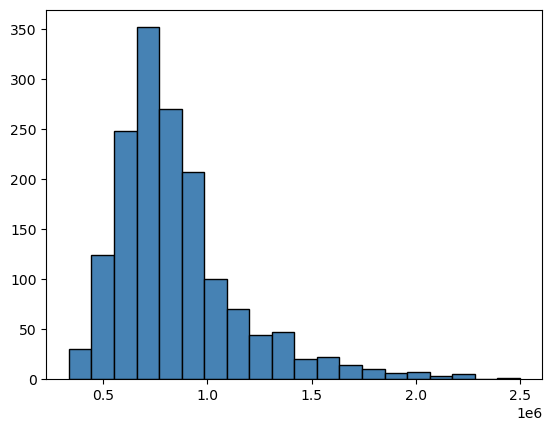

In [590]:
plt.hist(df['price'], color = 'steelblue', edgecolor = 'black', bins = 20)
plt.show()

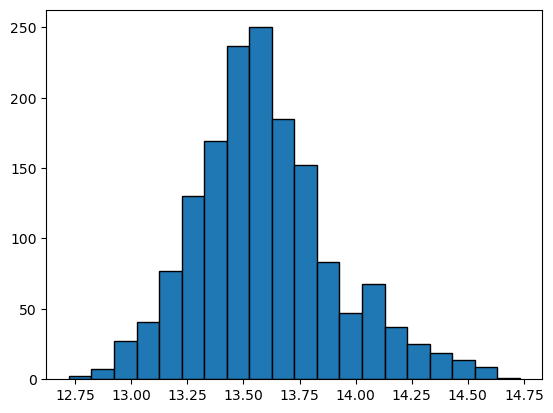

In [591]:
plt.hist(df['lprice'], bins = 20, edgecolor = 'black')
plt.show()

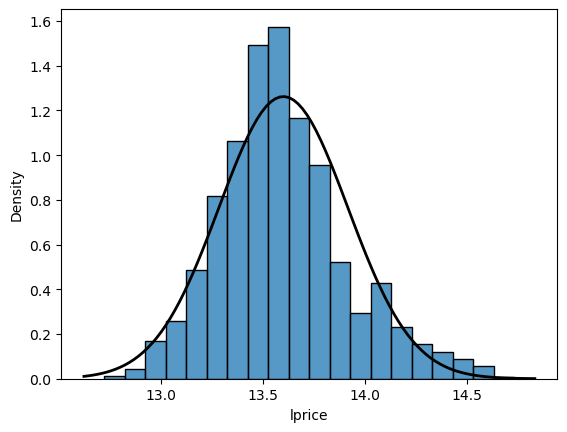

In [592]:
sns.histplot(data = df['lprice'], bins = 20, stat = 'density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - np.mean(df['lprice'])) / np.std(df['lprice']))**2) / (np.std(df['lprice']) * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

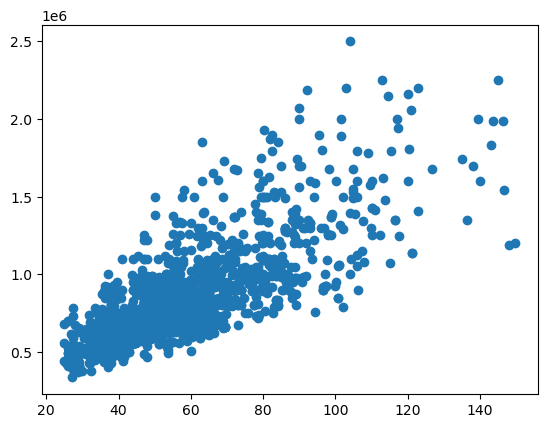

In [593]:
plt.plot(df['area'], df['price'], 'o')

<Axes: xlabel='area', ylabel='price'>

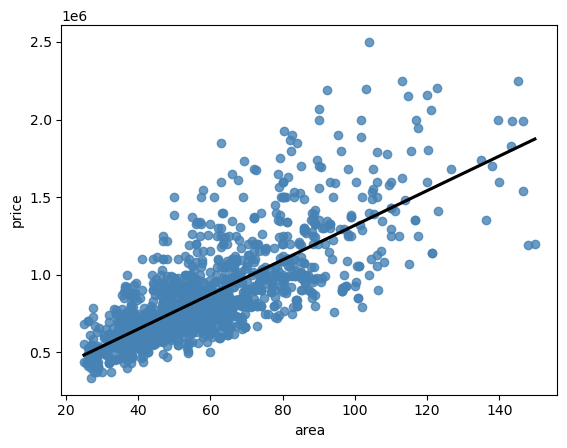

In [594]:
sns.regplot(x = 'area', y = 'price', data = df,ci = None, line_kws={'color':'black'}, scatter_kws={'color':'steelblue'})

<Axes: xlabel='larea', ylabel='lprice'>

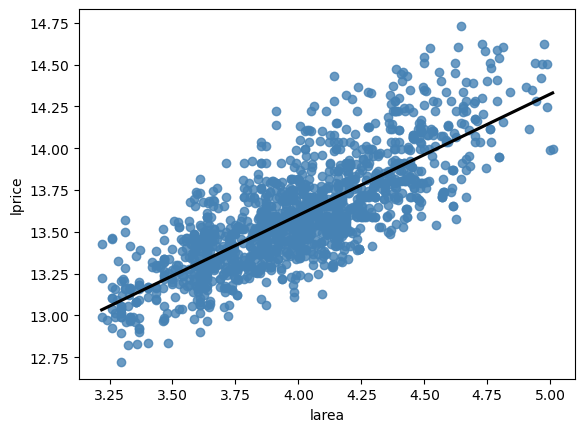

In [595]:
sns.regplot(x = 'larea', y = 'lprice', data = df,ci = None, line_kws={'color':'black'}, scatter_kws={'color':'steelblue'})

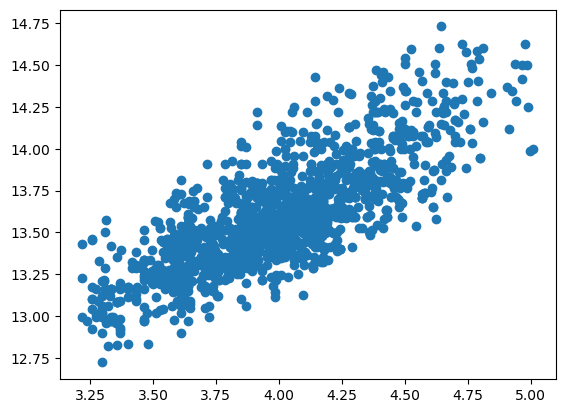

In [596]:
plt.plot(df['larea'],df['lprice'],'o')

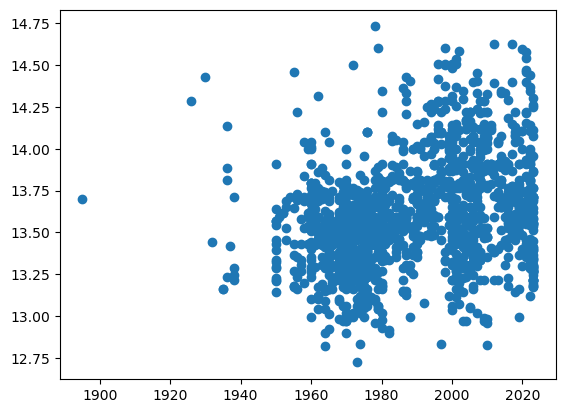

In [597]:
plt.plot(df['year'],df['lprice'], 'o')

In [598]:
df['age'] = 2024 - df['year']

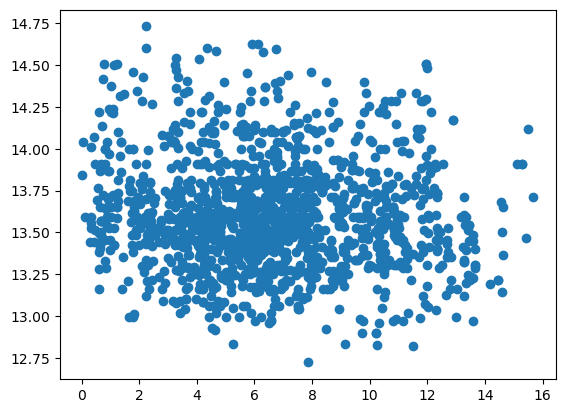

In [599]:
plt.plot(df['centre'], df['lprice'], 'o')

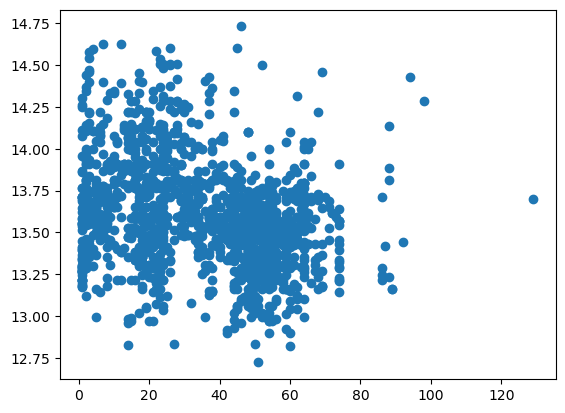

In [600]:
plt.plot(df['age'], df['lprice'], 'o')

In [601]:
df.head()

,city,type,area,rooms,floor,year,centre,poi,ownership,parking,balcony,elevator,security,storage,price,larea,lcentre,lprice,age,agesq
0,warszawa,blockOfFlats,77.00,3.0,2.0,2022.0,11.43,3.0,1,1,1,1,1,0,950000,4.343805,2.436241,13.764217,2.0,4.0
1,warszawa,blockOfFlats,62.20,4.0,4.0,1981.0,10.31,13.0,1,0,1,0,0,1,680000,4.130355,2.333114,13.429848,43.0,1849.0
2,warszawa,blockOfFlats,73.40,3.0,6.0,2007.0,5.68,60.0,1,1,1,1,0,0,954000,4.295924,1.736951,13.768419,17.0,289.0
3,warszawa,blockOfFlats,48.07,3.0,13.0,1972.0,0.67,52.0,0,0,0,1,0,1,720000,3.872658,-0.400478,13.487006,52.0,2704.0
4,warszawa,blockOfFlats,56.20,3.0,3.0,1961.0,4.86,14.0,0,0,1,1,0,1,840000,4.028917,1.581038,13.641157,63.0,3969.0


In [602]:
df_ciagle = df[['area','rooms','floor','age','centre','poi','price','lprice']]

In [603]:
import seaborn as sns

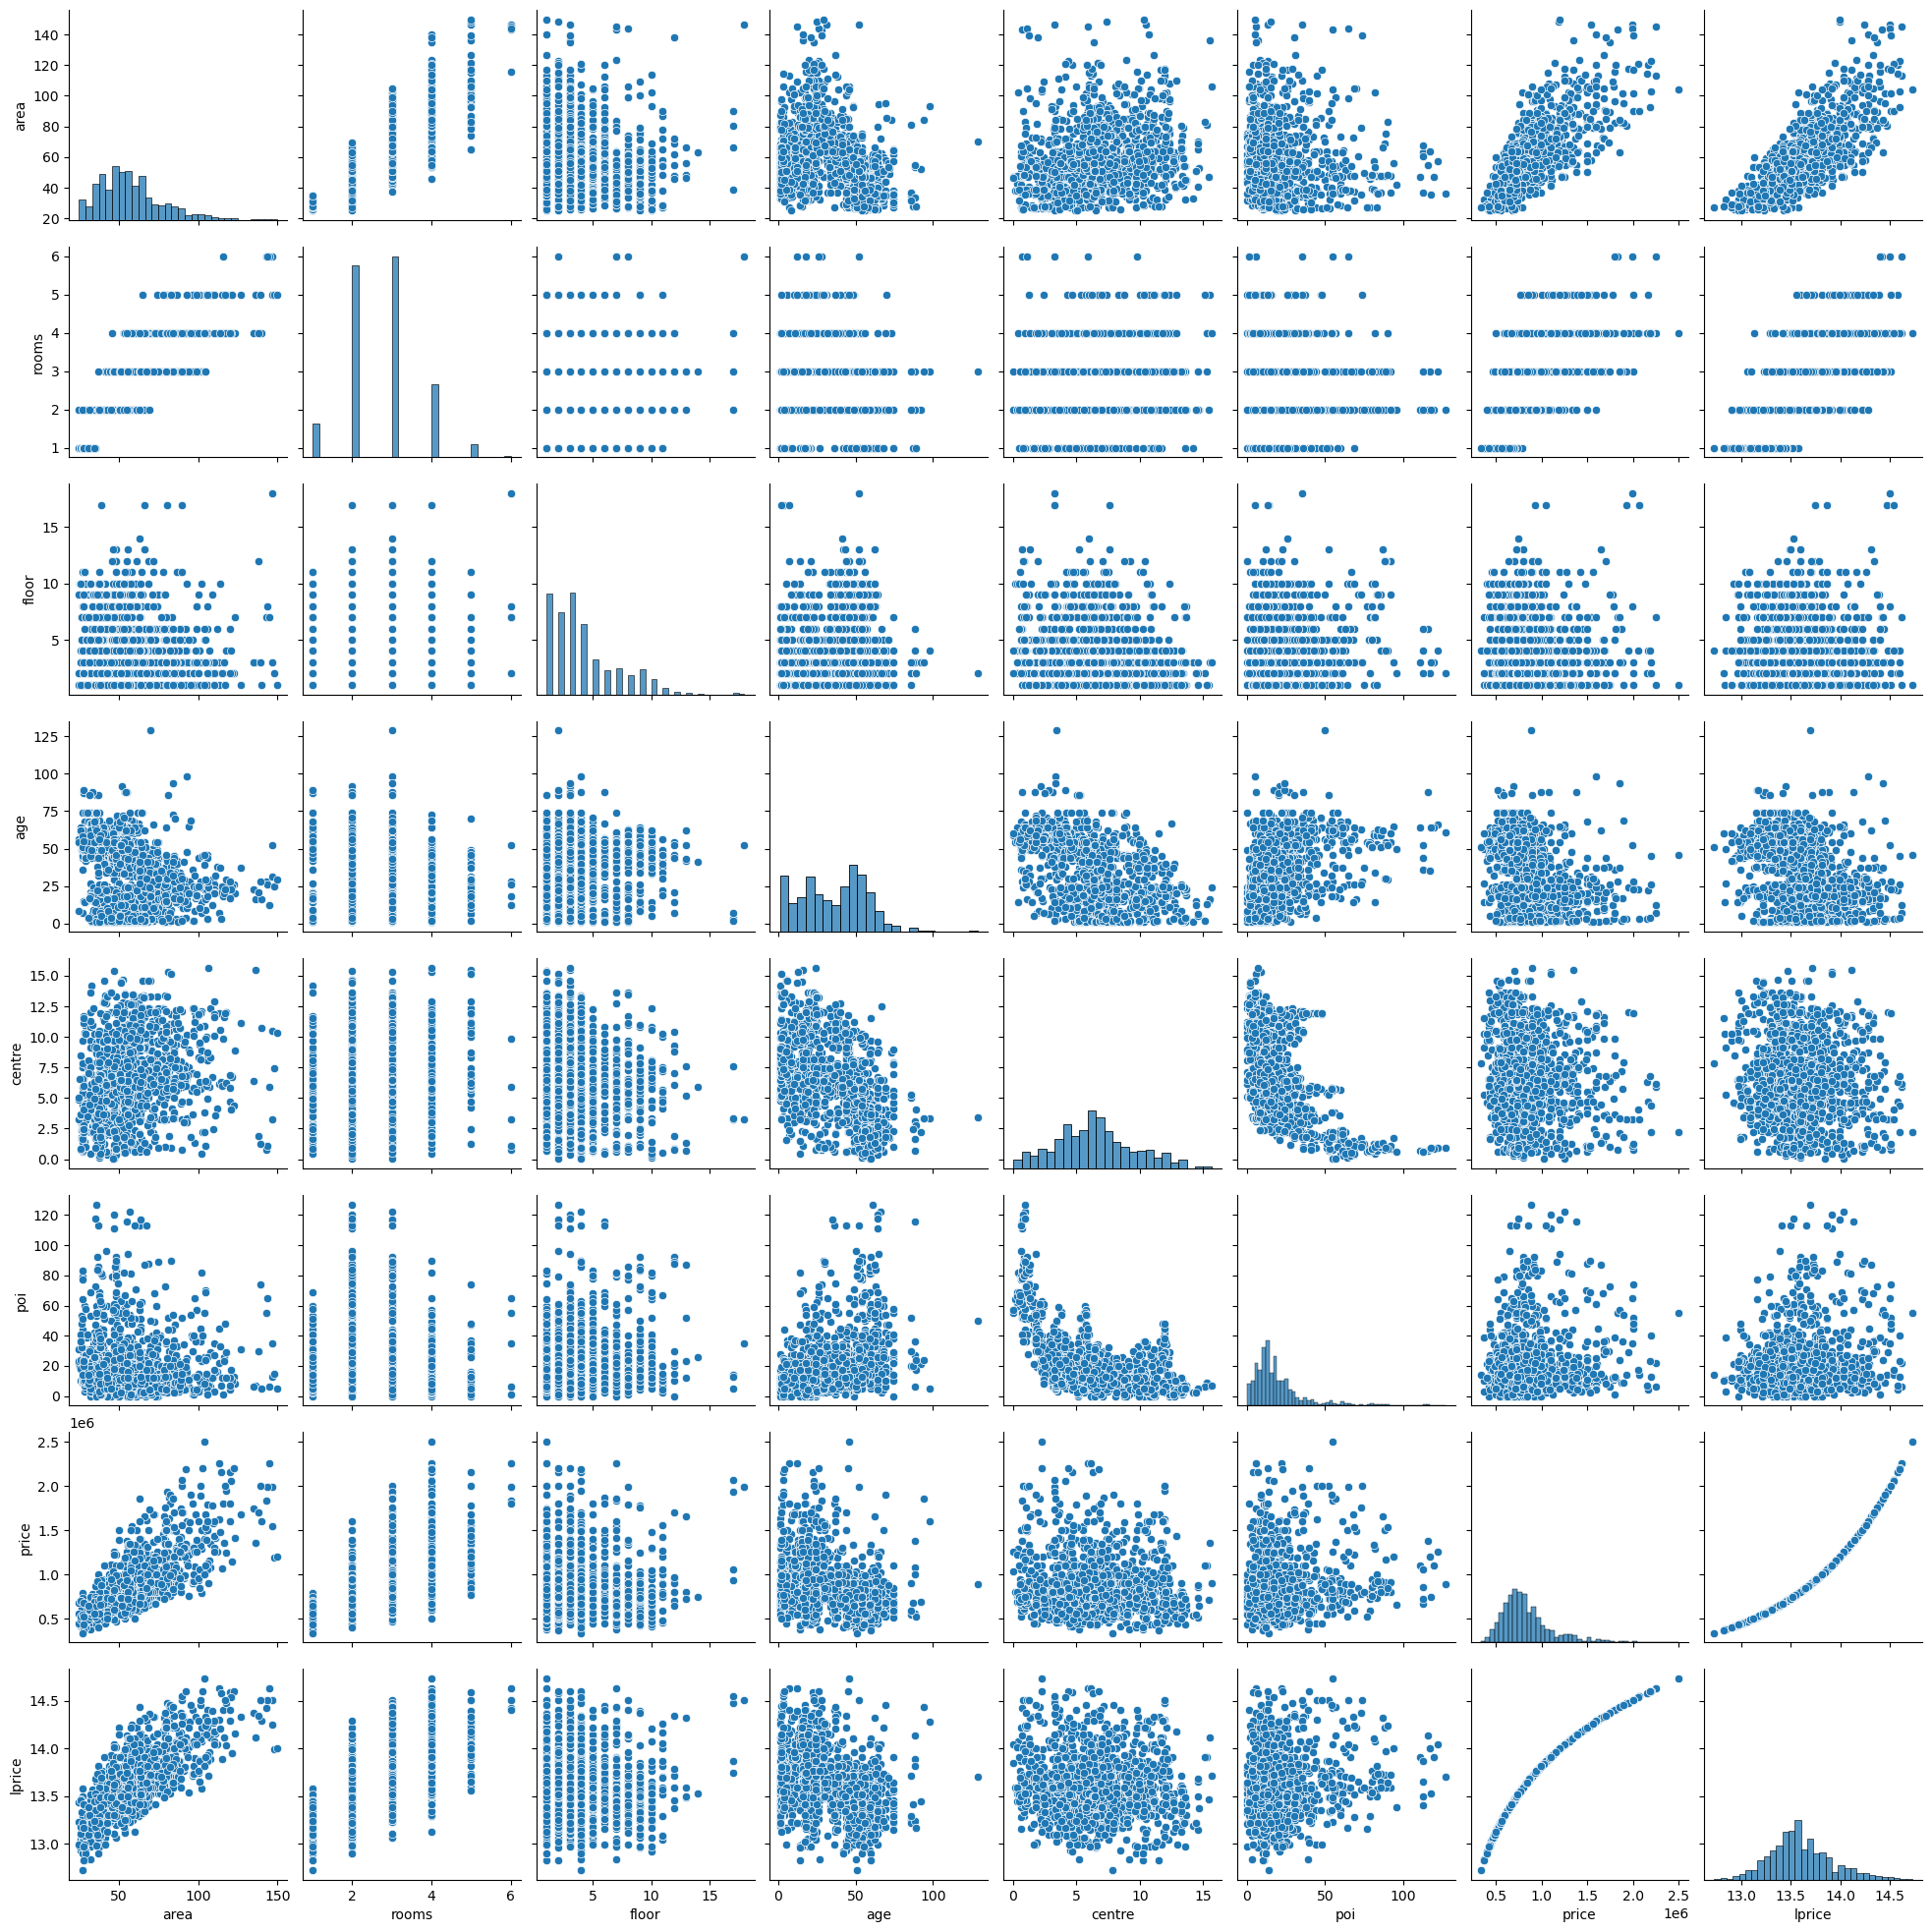

In [604]:
sns.pairplot(df_ciagle)

In [605]:
#wstępnie decyduje się za zmienną zależną bez logarytmu 
df_ciagle = df[['area','rooms','floor','age','centre','price']]

In [606]:
#kandydaci na zmienne w kwadracie: floor, age(bardziej intuicja niż wykres)
df['sqfloor'] = df['floor']**2
df['sqage'] = df['age']**2

<Axes: xlabel='lprice', ylabel='floor'>

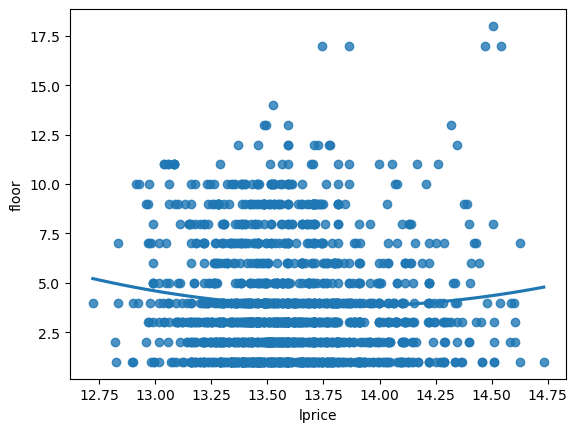

In [607]:
sns.regplot(data = df, x = 'lprice', y = 'floor', ci = None, order = 2)

<Axes: xlabel='price', ylabel='age'>

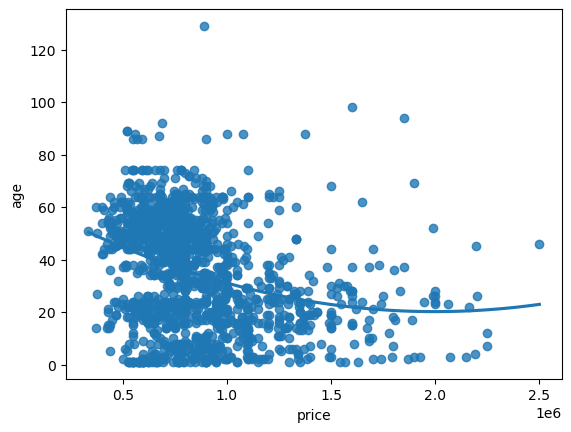

In [608]:
sns.regplot(data = df, x = 'price', y = 'age', ci = None, order = 2)
#według mnie nie jest to zbyt duża relacja kwadratowa

In [609]:
df.head()

,city,type,area,rooms,floor,year,centre,poi,ownership,parking,...,security,storage,price,larea,lcentre,lprice,age,agesq,sqfloor,sqage
0,warszawa,blockOfFlats,77.00,3.0,2.0,2022.0,11.43,3.0,1,1,...,1,0,950000,4.343805,2.436241,13.764217,2.0,4.0,4.0,4.0
1,warszawa,blockOfFlats,62.20,4.0,4.0,1981.0,10.31,13.0,1,0,...,0,1,680000,4.130355,2.333114,13.429848,43.0,1849.0,16.0,1849.0
2,warszawa,blockOfFlats,73.40,3.0,6.0,2007.0,5.68,60.0,1,1,...,0,0,954000,4.295924,1.736951,13.768419,17.0,289.0,36.0,289.0
3,warszawa,blockOfFlats,48.07,3.0,13.0,1972.0,0.67,52.0,0,0,...,0,1,720000,3.872658,-0.400478,13.487006,52.0,2704.0,169.0,2704.0
4,warszawa,blockOfFlats,56.20,3.0,3.0,1961.0,4.86,14.0,0,0,...,0,1,840000,4.028917,1.581038,13.641157,63.0,3969.0,9.0,3969.0


In [610]:
#teraz przyjrzyjmy się trochę zmiennym zerojedynkowym
df_ciagle_zo = df[['area','rooms','floor','age','centre','poi','price', 'ownership','parking','balcony','elevator','security','storage']]

In [611]:
 df.groupby('ownership').mean()

C:\Users\Mariusz\AppData\Local\Temp\ipykernel_25552\4031042163.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('ownership').mean()


,area,rooms,floor,year,centre,poi,parking,balcony,elevator,security,storage,price,larea,lcentre,lprice,age,agesq,sqfloor,sqage
ownership,,,,,,,,,,,,,,,,,,,
0,58.312155,2.847701,4.577586,1979.767241,6.024454,22.537356,0.293103,0.718391,0.704023,0.048851,0.752874,809198.951149,4.00423,1.659946,13.555002,44.232759,2092.979885,30.244253,2092.979885
1,57.817662,2.653409,3.810065,1990.864448,6.617703,19.446429,0.296266,0.700487,0.712662,0.176948,0.448052,860841.442370,3.99846,1.717701,13.611762,33.135552,1576.280032,22.030844,1576.280032


In [612]:
 df.groupby('parking').mean()

C:\Users\Mariusz\AppData\Local\Temp\ipykernel_25552\340588743.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('parking').mean()


,area,rooms,floor,year,centre,poi,ownership,balcony,elevator,security,storage,price,larea,lcentre,lprice,age,agesq,sqfloor,sqage
parking,,,,,,,,,,,,,,,,,,,
0,55.050566,2.615454,4.123091,1984.092543,6.190629,20.912848,0.778976,0.678347,0.701707,0.141060,0.555256,816061.381851,3.951849,1.661671,13.563637,39.907457,2002.466307,25.097035,2002.466307
1,64.780964,2.888651,3.635974,1998.734475,7.193469,18.254818,0.781585,0.766595,0.732334,0.167024,0.419700,929082.599572,4.113849,1.808199,13.684162,25.265525,945.586724,20.843683,945.586724


In [613]:
 df.groupby('balcony').mean()

C:\Users\Mariusz\AppData\Local\Temp\ipykernel_25552\3713688148.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('balcony').mean()


,area,rooms,floor,year,centre,poi,ownership,parking,elevator,security,storage,price,larea,lcentre,lprice,age,agesq,sqfloor,sqage
balcony,,,,,,,,,,,,,,,,,,,
0,54.690792,2.541756,4.004283,1983.944325,5.924433,22.554604,0.790150,0.233405,0.713062,0.149893,0.456103,806358.072805,3.927175,1.564891,13.546610,40.055675,2086.252677,25.083512,2086.252677
1,59.284268,2.761006,3.968553,1990.298293,6.723100,19.108715,0.775382,0.321653,0.709793,0.148248,0.539982,867554.961366,4.030175,1.763761,13.621352,33.701707,1523.858041,23.318059,1523.858041


In [614]:
df_ciagle.corr(method = 'spearman')

,area,rooms,floor,age,centre,price
area,1.000000,0.836942,-0.106465,-0.350708,0.289993,0.772711
rooms,0.836942,1.000000,-0.066520,-0.161677,0.206689,0.621765
floor,-0.106465,-0.066520,1.000000,0.144329,-0.182825,-0.035622
age,-0.350708,-0.161677,0.144329,1.000000,-0.511415,-0.296840
centre,0.289993,0.206689,-0.182825,-0.511415,1.000000,-0.041031
price,0.772711,0.621765,-0.035622,-0.296840,-0.041031,1.000000


<Axes: >

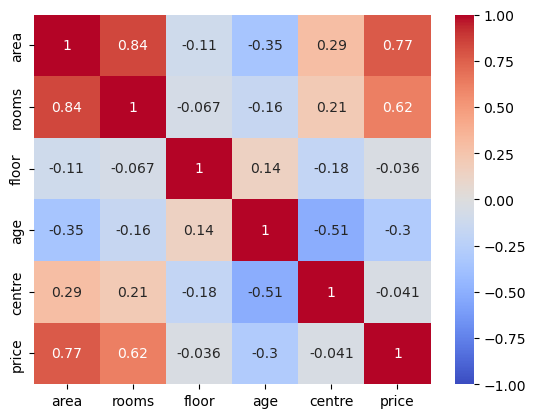

In [615]:
sns.heatmap(df_ciagle.corr(method = 'spearman'), vmax = 1, vmin = -1, cmap = 'coolwarm', annot = True)
#eksperckim okiem widzę, że liczba metrów kwadratowych jest mocno skorelowana z liczbą pokoi odrzucam
#liczbę pokoi bo ma mniejszy wpływ na zmienną zależną

In [616]:
df_ciagle.describe()

,area,rooms,floor,age,centre,price
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1.580000e+03
mean,57.926576,2.696203,3.979114,35.579747,6.487038,8.494670e+05
std,20.794409,0.901121,2.830476,20.601822,3.114444,3.025090e+05
min,25.000000,1.000000,1.000000,1.000000,0.020000,3.350000e+05
25%,42.500000,2.000000,2.000000,19.000000,4.270000,6.565500e+05
50%,54.850000,3.000000,3.000000,38.000000,6.315000,7.800000e+05
75%,67.015000,3.000000,5.000000,52.000000,8.162500,9.500000e+05
max,149.800000,6.000000,18.000000,129.000000,15.670000,2.500000e+06


In [617]:
print(df_ciagle_zo)

        area  rooms  floor   age  centre   poi    price  ownership  parking  \
0      77.00    3.0    2.0   2.0   11.43   3.0   950000          1        1   
1      62.20    4.0    4.0  43.0   10.31  13.0   680000          1        0   
2      73.40    3.0    6.0  17.0    5.68  60.0   954000          1        1   
3      48.07    3.0   13.0  52.0    0.67  52.0   720000          0        0   
4      56.20    3.0    3.0  63.0    4.86  14.0   840000          0        0   
...      ...    ...    ...   ...     ...   ...      ...        ...      ...   
1575   98.99    3.0    6.0  19.0    5.53   4.0  1386000          1        0   
1576   95.37    4.0    1.0  69.0    1.79  54.0  1900000          1        0   
1577  138.00    4.0   12.0  21.0    1.91  30.0  1700000          1        0   
1578   80.00    3.0    3.0  15.0   10.39  36.0  1500000          1        1   
1579   90.00    3.0   11.0  30.0    4.72  15.0  1560000          0        0   

      balcony  elevator  security  storage  
0     

In [618]:
import statsmodels.formula.api as smf

In [619]:
m1 = smf.ols(formula = 'lprice~larea+floor+age+agesq+centre+ownership+parking+elevator+security+storage', data = df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     475.4
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:58:49   Log-Likelihood:                 678.91
No. Observations:                1580   AIC:                            -1336.
Df Residuals:                    1569   BIC:                            -1277.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7939      0.059    183.942      0.000      10.679      10.909
larea          0.7838      0.013     60.806      0.000       0.759       0.809
floor          0.0006      0.002      0.370      0.711      -0.002       0.004
age           -0.0071      0.001     -9.621      0.000      -0.009      -0.006
agesq       6.543e-05   8.93e-06      7.330      0.000    4.79e-05    8.29e-05
centre        -0.0373      0.002    -24.296      0.000      -0.040      -0.034
ownership      0.0304      0.010      2.953      0.003       0.010       0.051
parking       -0.0070      0.009     -0.745      0.457      -0.025       0.011
elevator       0.0406      0.010      4.066      0.000       0.021       0.060
security       0.0403      0.012      3.298      0.001       0.016       0.064
storage       -0.0109      0.010     -1.110      0.267      -0.030       0.008
==============================================================================
Omnibus:                       52.725   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.589
Skew:                           0.401   Prob(JB):                     4.23e-14
Kurtosis:                       3.541   Cond. No.                     3.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [620]:
hip1 = '(floor = 0)'
m1.f_test(hip1)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.1369767217002355, p=0.7113552041800402, df_denom=1.57e+03, df_num=1>

In [621]:
m2 = smf.ols(formula = 'lprice~larea+age+agesq+centre+ownership+parking+elevator+security+storage', data = df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     528.5
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:58:49   Log-Likelihood:                 678.85
No. Observations:                1580   AIC:                            -1338.
Df Residuals:                    1570   BIC:                            -1284.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7954      0.059    184.454      0.000      10.681      10.910
larea          0.7837      0.013     60.821      0.000       0.758       0.809
age           -0.0070      0.001     -9.657      0.000      -0.008      -0.006
agesq       6.505e-05   8.87e-06      7.337      0.000    4.77e-05    8.24e-05
centre        -0.0373      0.002    -24.426      0.000      -0.040      -0.034
ownership      0.0302      0.010      2.939      0.003       0.010       0.050
parking       -0.0071      0.009     -0.759      0.448      -0.025       0.011
elevator       0.0418      0.009      4.423      0.000       0.023       0.060
security       0.0402      0.012      3.291      0.001       0.016       0.064
storage       -0.0109      0.010     -1.109      0.268      -0.030       0.008
==============================================================================
Omnibus:                       52.468   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.219
Skew:                           0.400   Prob(JB):                     5.09e-14
Kurtosis:                       3.538   Cond. No.                     3.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [622]:
hip2 = '(floor = 0), (parking = 0)'
m1.f_test(hip2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.35661488855745166, p=0.7000987665472514, df_denom=1.57e+03, df_num=2>

In [623]:
m3 = smf.ols(formula = 'lprice~larea+age+agesq+centre+ownership+storage+elevator+security', data = df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     594.6
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:58:49   Log-Likelihood:                 678.56
No. Observations:                1580   AIC:                            -1339.
Df Residuals:                    1571   BIC:                            -1291.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7949      0.059    184.483      0.000      10.680      10.910
larea          0.7826      0.013     61.195      0.000       0.757       0.808
age           -0.0069      0.001     -9.657      0.000      -0.008      -0.006
agesq       6.472e-05   8.85e-06      7.310      0.000    4.74e-05    8.21e-05
centre        -0.0373      0.002    -24.419      0.000      -0.040      -0.034
ownership      0.0307      0.010      2.992      0.003       0.011       0.051
storage       -0.0113      0.010     -1.148      0.251      -0.031       0.008
elevator       0.0419      0.009      4.439      0.000       0.023       0.060
security       0.0412      0.012      3.386      0.001       0.017       0.065
==============================================================================
Omnibus:                       52.440   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.972
Skew:                           0.401   Prob(JB):                     5.76e-14
Kurtosis:                       3.530   Cond. No.                     3.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [624]:
hip3 = '(floor = 0), (parking = 0), (storage=0)'
m1.f_test(hip3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.6766776836773124, p=0.566333865788465, df_denom=1.57e+03, df_num=3>

In [625]:
hip4 = '(floor = 0), (parking = 0), (storage=0),(larea=0),(age=0),(agesq=0),(centre=0),(ownership=0),(elevator=0),(security=0)'
m1.f_test(hip4)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=475.39517162202964, p=0.0, df_denom=1.57e+03, df_num=10>

In [626]:
m1.t_test('(floor = 0)')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0006      0.002      0.370      0.711      -0.002       0.004

In [627]:
m1.t_test('(parking = 0)')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0070      0.009     -0.745      0.457      -0.025       0.011

In [628]:
m1.t_test('(storage = 0)')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0109      0.010     -1.110      0.267      -0.030       0.008

In [629]:
m4.t_test('(agesq = 0)')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          6.656e-05   8.71e-06      7.642      0.000    4.95e-05    8.36e-05

In [630]:
df['lage'] = np.log(df['age'])
df['lcentre'] = np.log(df['centre']*1000)
df['lpoi'] = np.log(df['poi'])
df['areasq'] = df['area']**2
df['agesq'] = df['age']**2

C:\Users\Mariusz\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [631]:
m4 = smf.ols(formula = 'lprice~larea+age+agesq+centre+ownership+elevator+security', data = df).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     679.3
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:58:49   Log-Likelihood:                 677.89
No. Observations:                1580   AIC:                            -1340.
Df Residuals:                    1572   BIC:                            -1297.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7972      0.058    184.611      0.000      10.682      10.912
larea          0.7819      0.013     61.199      0.000       0.757       0.807
age           -0.0072      0.001    -10.660      0.000      -0.009      -0.006
agesq       6.656e-05   8.71e-06      7.642      0.000    4.95e-05    8.36e-05
centre        -0.0373      0.002    -24.460      0.000      -0.040      -0.034
ownership      0.0320      0.010      3.137      0.002       0.012       0.052
elevator       0.0427      0.009      4.532      0.000       0.024       0.061
security       0.0415      0.012      3.413      0.001       0.018       0.065
==============================================================================
Omnibus:                       50.471   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.436
Skew:                           0.393   Prob(JB):                     2.05e-13
Kurtosis:                       3.520   Cond. No.                     3.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [632]:
stargazer = Stargazer([m1, m2, m3, m4])
HTML(stargazer.render_html())

In [633]:
import statsmodels.api as sm

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


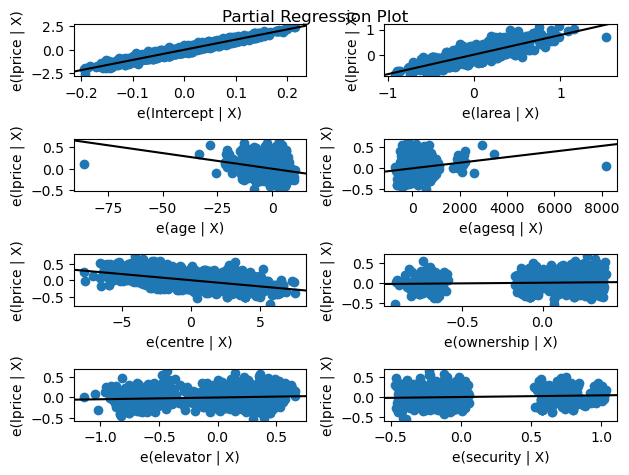

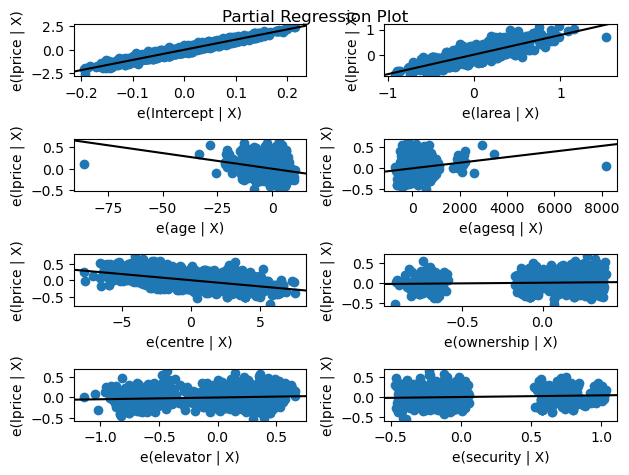

In [634]:
sm.graphics.plot_partregress_grid(m4)

In [635]:
import statsmodels.stats.outliers_influence as oi

In [636]:
oi.reset_ramsey(m4, degree = 2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=11.270779735449421, p=0.0008061712731105412, df_denom=1.57e+03, df_num=1>

In [637]:
sms.linear_reset(m4, power = 2, test_type = 'fitted')

C:\Users\Mariusz\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=11.2707797354512, p-value=0.000787366496928058, df_denom=1>

In [638]:
def get_vif(exogs, data):
    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [639]:
zmienne = ['larea','age','lcentre', 'agesq']

In [640]:
get_vif(exogs = zmienne, data = df)

,VIF,Tolerance
larea,1.159369,0.862538
age,10.494834,0.095285
lcentre,1.255678,0.796383
agesq,10.753326,0.092994


In [641]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [642]:
h_lev = (2*len(m4.params))/m4.nobs
round(h_lev, 2)

0.01

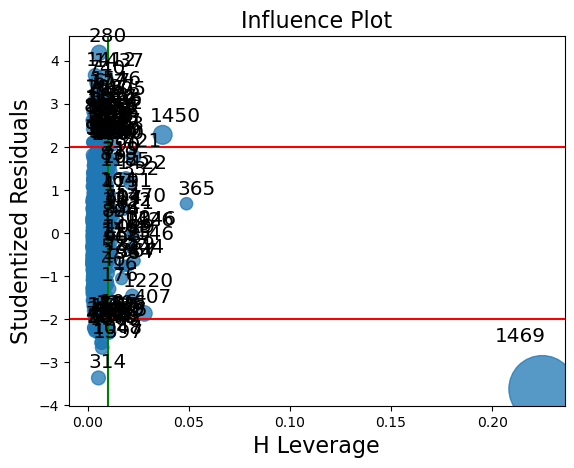

In [643]:
sm.graphics.influence_plot(m4, criterion = 'Cooks')
plt.axvline(x = round(h_lev, 2), color = 'g')
plt.axhline(y=2, color = 'r')
plt.axhline(y=-2, color = 'r')
plt.show()

In [644]:
df['cooks'] = m4.get_influence().cooks_distance[0]
df.head()

,city,type,area,rooms,floor,year,centre,poi,ownership,parking,...,lcentre,lprice,age,agesq,sqfloor,sqage,lage,lpoi,areasq,cooks
0,warszawa,blockOfFlats,77.00,3.0,2.0,2022.0,11.43,3.0,1,1,...,9.343997,13.764217,2.0,4.0,4.0,4.0,0.693147,1.098612,5929.0000,0.000387
1,warszawa,blockOfFlats,62.20,4.0,4.0,1981.0,10.31,13.0,1,0,...,9.240870,13.429848,43.0,1849.0,16.0,1849.0,3.761200,2.564949,3868.8400,0.000064
2,warszawa,blockOfFlats,73.40,3.0,6.0,2007.0,5.68,60.0,1,1,...,8.644707,13.768419,17.0,289.0,36.0,289.0,2.833213,4.094345,5387.5600,0.000276
3,warszawa,blockOfFlats,48.07,3.0,13.0,1972.0,0.67,52.0,0,0,...,6.507278,13.487006,52.0,2704.0,169.0,2704.0,3.951244,3.951244,2310.7249,0.000646
4,warszawa,blockOfFlats,56.20,3.0,3.0,1961.0,4.86,14.0,0,0,...,8.488794,13.641157,63.0,3969.0,9.0,3969.0,4.143135,2.639057,3158.4400,0.000014


In [645]:
df[df['cooks']> 4*df['cooks'].mean()].sort_values(by = 'cooks', ascending = False)

,city,type,area,rooms,floor,year,centre,poi,ownership,parking,...,lcentre,lprice,age,agesq,sqfloor,sqage,lage,lpoi,areasq,cooks
1469,warszawa,blockOfFlats,70.00,3.0,2.0,1895.0,3.39,50.0,1,0,...,8.128585,13.698977,129.0,16641.0,4.0,16641.0,4.859812,3.912023,4900.0000,0.470625
1450,warszawa,blockOfFlats,84.10,3.0,3.0,1930.0,3.36,24.0,1,1,...,8.119696,14.430696,94.0,8836.0,9.0,8836.0,4.543295,3.178054,7072.8100,0.024863
1437,warszawa,blockOfFlats,117.00,5.0,1.0,2001.0,11.95,48.0,0,0,...,9.388487,14.508658,23.0,529.0,1.0,529.0,3.135494,3.871201,13689.0000,0.013584
407,warszawa,blockOfFlats,52.00,2.0,3.0,1932.0,2.21,21.0,1,0,...,7.700748,13.444447,92.0,8464.0,9.0,8464.0,4.521789,3.044522,2704.0000,0.012505
280,warszawa,blockOfFlats,101.60,4.0,1.0,1998.0,11.95,45.0,1,1,...,9.388487,14.508158,26.0,676.0,1.0,676.0,3.258097,3.806662,10322.5600,0.012109
1105,warszawa,blockOfFlats,117.33,4.0,4.0,2000.0,11.98,29.0,1,0,...,9.390994,14.480773,24.0,576.0,16.0,576.0,3.178054,3.367296,13766.3289,0.010393
617,warszawa,blockOfFlats,82.54,4.0,1.0,2021.0,7.95,9.0,1,1,...,8.980927,14.457364,3.0,9.0,1.0,9.0,1.098612,2.197225,6812.8516,0.009417
421,warszawa,blockOfFlats,55.00,2.0,6.0,1936.0,0.70,116.0,1,0,...,6.551080,14.133964,88.0,7744.0,36.0,7744.0,4.477337,4.753590,3025.0000,0.008961
1546,warszawa,blockOfFlats,104.00,4.0,1.0,1978.0,2.22,55.0,1,0,...,7.705262,14.731801,46.0,2116.0,1.0,2116.0,3.828641,4.007333,10816.0000,0.008387
314,warszawa,blockOfFlats,102.00,3.0,3.0,2017.0,8.92,4.0,1,1,...,9.096051,13.579788,7.0,49.0,9.0,49.0,1.945910,1.386294,10404.0000,0.007400


In [646]:
df.iloc[1408]

city             warszawa
type         blockOfFlats
area                46.54
rooms                 3.0
floor                 4.0
year               1964.0
centre               0.02
poi                  57.0
ownership               1
parking                 1
balcony                 1
elevator                1
security                0
storage                 1
price             1029000
larea            3.840312
lcentre          2.995732
lprice          13.844098
age                  60.0
agesq              3600.0
sqfloor              16.0
sqage              3600.0
lage             4.094345
lpoi             4.043051
areasq          2165.9716
cooks            0.000538
Name: 1408, dtype: object

In [647]:
df.iloc[1469]

city             warszawa
type         blockOfFlats
area                 70.0
rooms                 3.0
floor                 2.0
year               1895.0
centre               3.39
poi                  50.0
ownership               1
parking                 0
balcony                 0
elevator                0
security                0
storage                 1
price              890000
larea            4.248495
lcentre          8.128585
lprice          13.698977
age                 129.0
agesq             16641.0
sqfloor               4.0
sqage             16641.0
lage             4.859812
lpoi             3.912023
areasq             4900.0
cooks            0.470625
Name: 1469, dtype: object

In [648]:
m4_1 = smf.ols(formula = 'lprice~larea+age+agesq+centre+ownership+elevator+security', data = df[df['parking'] == 0]).fit()
m4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     456.0
Date:                Fri, 19 Jan 2024   Prob (F-statistic):          1.40e-320
Time:                        01:58:55   Log-Likelihood:                 512.99
No. Observations:                1113   AIC:                            -1010.
Df Residuals:                    1105   BIC:                            -969.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8803      0.068    159.555      0.000      10.746      11.014
larea          0.7650      0.015     50.360      0.000       0.735       0.795
age           -0.0065      0.001     -8.234      0.000      -0.008      -0.005
agesq       5.555e-05   9.52e-06      5.833      0.000    3.69e-05    7.42e-05
centre        -0.0379      0.002    -20.595      0.000      -0.042      -0.034
ownership      0.0200      0.012      1.723      0.085      -0.003       0.043
elevator       0.0270      0.011      2.486      0.013       0.006       0.048
security       0.0490      0.015      3.173      0.002       0.019       0.079
==============================================================================
Omnibus:                       32.361   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.730
Skew:                           0.370   Prob(JB):                     1.06e-08
Kurtosis:                       3.495   Cond. No.                     3.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [649]:
m4_2 = smf.ols(formula = 'lprice~larea+age+agesq+centre+ownership+elevator+security', data = df[df['parking'] == 1]).fit()
m4_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     200.7
Date:                Fri, 19 Jan 2024   Prob (F-statistic):          2.60e-135
Time:                        01:58:56   Log-Likelihood:                 175.91
No. Observations:                 467   AIC:                            -335.8
Df Residuals:                     459   BIC:                            -302.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5822      0.113     94.017      0.000      10.361      10.803
larea          0.8276      0.024     33.956      0.000       0.780       0.875
age           -0.0094      0.002     -5.921      0.000      -0.012      -0.006
agesq          0.0001   2.34e-05      4.282      0.000    5.42e-05       0.000
centre        -0.0366      0.003    -13.131      0.000      -0.042      -0.031
ownership      0.0525      0.021      2.448      0.015       0.010       0.095
elevator       0.0732      0.019      3.894      0.000       0.036       0.110
security       0.0472      0.021      2.229      0.026       0.006       0.089
==============================================================================
Omnibus:                       23.070   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.544
Skew:                           0.490   Prob(JB):                     1.72e-06
Kurtosis:                       3.636   Cond. No.                     2.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [650]:
licznik = (m4.ssr - m4_1.ssr - m4_2.ssr)/(8*(2-1))

In [651]:
mianownik = (m4_1.ssr + m4_2.ssr)/(m4.nobs - 2*8)

In [652]:
F = licznik/mianownik
F

2.1449458305725955

In [653]:
import scipy.stats

In [654]:
scipy.stats.f.ppf(q = 1-0.05, dfn = 8, dfd = (m4.nobs - 2*8))

1.9443128806116419

In [655]:
#K = (1.94, +nieskończoność)

In [656]:
from statsmodels.compat import lzip

In [657]:
import statsmodels.stats.api as sms

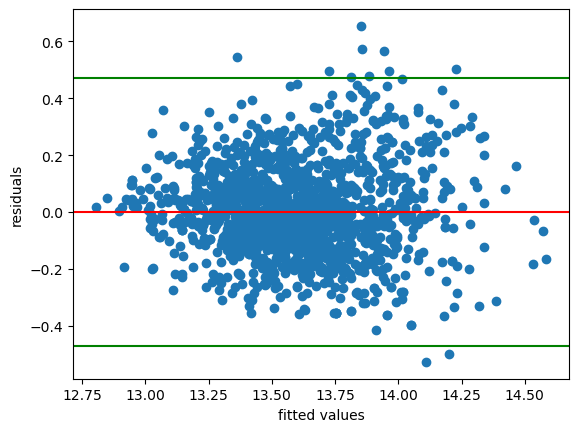

In [658]:
plt.scatter(m4.fittedvalues, m4.resid)
plt.axhline(y = 0, color = 'red')
plt.axhline(y=0 + 3*m4.resid.std(), color = 'green')
plt.axhline(y=0 - 3*m4.resid.std(), color = 'green')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

In [488]:
test1 = sms.het_breuschpagan(m4.resid, m4.model.exog)
test1

(131.4192776712783,
 3.1750133870632063e-25,
 20.373745469302822,
 2.4612122791936366e-26)

In [489]:
nam1 = ['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

In [490]:
lzip(nam1, test1)

[('lagrange multiplier statistic', 131.4192776712783),
 ('p-value', 3.1750133870632063e-25),
 ('f-value', 20.373745469302822),
 ('f p-value', 2.4612122791936366e-26)]

In [491]:
test2 = sms.het_white(m4.resid, m4.model.exog)
test2

(227.20156650383956,
 1.0015627724680967e-31,
 8.386630172456721,
 1.1930201972143024e-34)

In [492]:
lzip(nam1, test2)

[('lagrange multiplier statistic', 227.20156650383956),
 ('p-value', 1.0015627724680967e-31),
 ('f-value', 8.386630172456721),
 ('f p-value', 1.1930201972143024e-34)]

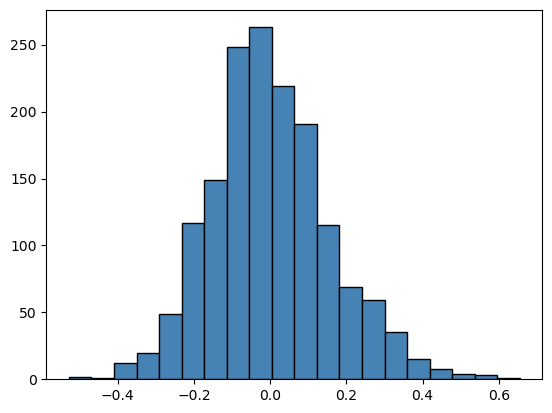

In [494]:
plt.hist(m4.resid, bins = 20, color = 'steelblue', edgecolor = 'black')
plt.show()

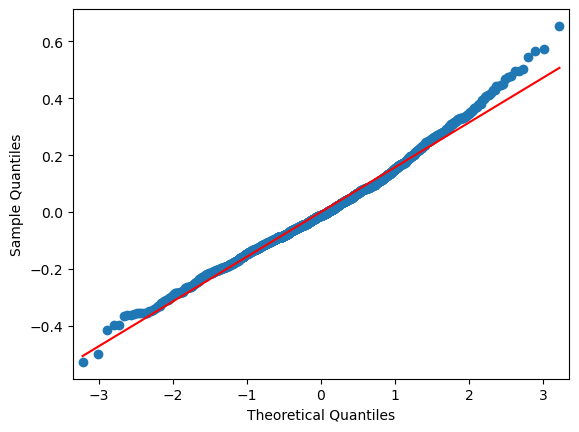

In [495]:
sm.qqplot(m4.resid, line = 'r')
plt.show()

In [496]:
test3 = sms.jarque_bera(m4.resid)
test3

(58.43599893115241,
 2.045427355273781e-13,
 0.3929760526247169,
 3.5195331703137906)

In [497]:
nam2 = ['The Jarque-Bera test statistic', 'p-value', 'skewness', 'kurtosis']

In [500]:
lzip(nam2, test3)

[('The Jarque-Bera test statistic', 58.43599893115241),
 ('p-value', 2.045427355273781e-13),
 ('skewness', 0.3929760526247169),
 ('kurtosis', 3.5195331703137906)]

In [505]:
# naprawienie problemu nieliniowości i współliniowości 

In [552]:
m5 = smf.ols(formula = 'lprice~larea+age+agesq+lcentre+ownership+elevator+security', data = df).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     641.5
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:24:43   Log-Likelihood:                 644.20
No. Observations:                1580   AIC:                            -1272.
Df Residuals:                    1572   BIC:                            -1229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9162      0.086    138.805      0.000      11.748      12.085
larea          0.7753      0.013     59.466      0.000       0.750       0.801
age           -0.0068      0.001     -9.812      0.000      -0.008      -0.005
agesq        6.62e-05    8.9e-06      7.438      0.000    4.87e-05    8.37e-05
lcentre       -0.1564      0.007    -22.531      0.000      -0.170      -0.143
ownership      0.0248      0.010      2.384      0.017       0.004       0.045
elevator       0.0479      0.010      4.987      0.000       0.029       0.067
security       0.0314      0.012      2.521      0.012       0.007       0.056
==============================================================================
Omnibus:                       21.092   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.371
Skew:                           0.202   Prob(JB):                     3.10e-06
Kurtosis:                       3.472   Cond. No.                     4.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [553]:
oi.reset_ramsey(m5, degree = 2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=4.206618647176267, p=0.04043208078846617, df_denom=1.57e+03, df_num=1>

In [509]:
m6 = smf.ols(formula = 'lprice~larea+age+lcentre+ownership+elevator+security', data = df).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     714.5
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:24:49   Log-Likelihood:                 616.87
No. Observations:                1580   AIC:                            -1220.
Df Residuals:                    1573   BIC:                            -1182.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9317      0.087    136.685      0.000      11.760      12.103
larea          0.7606      0.013     58.026      0.000       0.735       0.786
age           -0.0020      0.000     -7.647      0.000      -0.003      -0.001
lcentre       -0.1595      0.007    -22.646      0.000      -0.173      -0.146
ownership      0.0421      0.010      4.072      0.000       0.022       0.062
elevator       0.0448      0.010      4.586      0.000       0.026       0.064
security       0.0434      0.013      3.458      0.001       0.019       0.068
==============================================================================
Omnibus:                       32.930   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.833
Skew:                           0.308   Prob(JB):                     1.00e-08
Kurtosis:                       3.426   Cond. No.                         893.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [510]:
oi.reset_ramsey(m6, degree = 2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3.7152284831542888, p=0.054098238912528906, df_denom=1.57e+03, df_num=1>

In [511]:
Stargazer([m5,m6])

In [516]:
m6_1 = smf.ols(formula = 'lprice~larea+age+lcentre+ownership+elevator+security', data = df[df['parking'] == 0]).fit()
m6_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     490.8
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          1.32e-307
Time:                        17:38:43   Log-Likelihood:                 479.68
No. Observations:                1113   AIC:                            -945.4
Df Residuals:                    1106   BIC:                            -910.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0452      0.102    118.451      0.000      11.846      12.245
larea          0.7472      0.015     48.347      0.000       0.717       0.778
age           -0.0018      0.000     -5.939      0.000      -0.002      -0.001
lcentre       -0.1645      0.008    -19.454      0.000      -0.181      -0.148
ownership      0.0262      0.012      2.215      0.027       0.003       0.049
elevator       0.0289      0.011      2.608      0.009       0.007       0.051
security       0.0581      0.016      3.738      0.000       0.028       0.089
==============================================================================
Omnibus:                       18.429   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.487
Skew:                           0.240   Prob(JB):                     2.16e-05
Kurtosis:                       3.482   Cond. No.                         986.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [525]:
m6_2 = smf.ols(formula = 'lprice~larea+age+lcentre+ownership+elevator+security', data = df[df['parking'] == 1]).fit()
m6_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     205.1
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          1.34e-126
Time:                        18:08:46   Log-Likelihood:                 152.66
No. Observations:                 467   AIC:                            -291.3
Df Residuals:                     460   BIC:                            -262.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7239      0.167     70.085      0.000      11.395      12.053
larea          0.8010      0.025     31.985      0.000       0.752       0.850
age           -0.0029      0.001     -4.886      0.000      -0.004      -0.002
lcentre       -0.1569      0.013    -12.137      0.000      -0.182      -0.132
ownership      0.0557      0.022      2.534      0.012       0.012       0.099
elevator       0.0780      0.020      3.939      0.000       0.039       0.117
security       0.0376      0.022      1.686      0.092      -0.006       0.081
==============================================================================
Omnibus:                       22.860   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.318
Skew:                           0.486   Prob(JB):                     1.93e-06
Kurtosis:                       3.638   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
licznik = (m4.ssr - m4_1.ssr - m4_2.ssr)/(7*(2-1))

In [518]:
mianownik = (m4_1.ssr + m4_2.ssr)/(m4.nobs - 2*7)

In [519]:
F = licznik/mianownik
F

2.147688728054146

In [520]:
scipy.stats.f.ppf(q = 1-0.05, dfn = 7, dfd = (m4.nobs - 2*7))

2.015416536390412

In [526]:
#nie udało sie rozwiązać problemu

In [554]:
stargazer1 = Stargazer([m5,m6])
stargazer1.render_html()

'<table style="text-align:center"><tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr>\n<tr><td style="text-align:left"></td><td colspan="2"><em>Dependent variable: lprice</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td></tr>\n<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr>\n\n<tr><td style="text-align:left">Intercept</td><td>11.916<sup>***</sup></td><td>11.932<sup>***</sup></td></tr>\n<tr><td style="text-align:left"></td><td>(0.086)</td><td>(0.087)</td></tr>\n<tr><td style="text-align:left">age</td><td>-0.007<sup>***</sup></td><td>-0.002<sup>***</sup></td></tr>\n<tr><td style="text-align:left"></td><td>(0.001)</td><td>(0.000)</td></tr>\n<tr><td style="text-align:left">agesq</td><td>0.000<sup>***</sup></td><td></td></tr>\n<tr><td style="text-align:left"></td><td>(0.000)</td><td></td></tr>\n<tr><td style="text-align:left">elevator</td><td>0.048<sup>***</sup></td><td>0.045<sup>***</sup>

In [543]:
m7 = smf.ols(formula = 'lprice~larea+age+lcentre+ownership+elevator+security+security*lcentre+lcentre*elevator', data = df).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     540.8
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:04:18   Log-Likelihood:                 622.91
No. Observations:                1580   AIC:                            -1228.
Df Residuals:                    1571   BIC:                            -1180.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.3292      0.149     82.578      0.000      12.036      12.622
larea                0.7645      0.013     58.293      0.000       0.739       0.790
age                 -0.0021      0.000     -7.944      0.000      -0.003      -0.002
lcentre             -0.2061      0.016    -13.052      0.000      -0.237      -0.175
ownership            0.0403      0.010      3.895      0.000       0.020       0.061
elevator            -0.4478      0.143     -3.123      0.002      -0.729      -0.167
security             0.1252      0.147      0.854      0.393      -0.162       0.413
security:lcentre    -0.0093      0.017     -0.557      0.577      -0.042       0.023
lcentre:elevator     0.0564      0.016      3.443      0.001       0.024       0.089
==============================================================================
Omnibus:                       39.271   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.743
Skew:                           0.321   Prob(JB):                     7.08e-11
Kurtosis:                       3.547   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [544]:
oi.reset_ramsey(m6, degree = 2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3.7152284831542888, p=0.054098238912528906, df_denom=1.57e+03, df_num=1>